In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df_ted_main = pd.read_csv("data/ted_main.csv")
df_ted_transcripts = df = pd.read_csv("data/transcripts.csv")

In [4]:
df_ted_main.shape

(2550, 17)

In [5]:
df_ted_transcripts.shape

(2467, 2)

In [6]:
df_ted_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
df_ted_transcripts.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [8]:
occupation = list(df_ted_main['main_speaker'].unique())
print(len(occupation))
# 394

2156


In [9]:
import re
import string

In [10]:
def clean_text_round1(text):
#     Make all text lower case.
    text = text.lower()
#   Looks at the things in the square bracts and replaces them with nothing.  
    text = re.sub('\[.*?\]', ' ', text)
#   Replaces punctuation marks with nutting.
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
#   Replaces numbers with nothing  
    text = re.sub('\w*\d\w*', ' ', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [11]:
data_clean = pd.DataFrame(df_ted_transcripts.transcript.apply(round1))
data_clean

,transcript
0,good morning how are you laughter it s been ...
1,thank you so much chris and it s truly a gre...
2,music the sound of silence simon garfun...
3,if you re here today — and i m very happy that...
4,about years ago i took on the task to teach...
5,thank you i have to tell you i m both challen...
6,on september the morning of my seventh birt...
7,i m going to present three projects in rapid f...
8,it s wonderful to be back i love this wonderf...
9,i m often asked what surprised you about the...


In [12]:
speaker_u = list(df_ted_main['name'].unique())
print(len(speaker_u))

2550


In [13]:
speaker = list(df_ted_main['name'])
print(len(speaker))
# They are all unique speakers.

2550


In [14]:
def clean_text_round2(text):
    text = re.sub('[""''*,:;<>_-]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [15]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
0,good morning how are you laughter it s been ...
1,thank you so much chris and it s truly a gre...
2,music the sound of silence simon garfun...
3,if you re here today — and i m very happy that...
4,about years ago i took on the task to teach...
5,thank you i have to tell you i m both challen...
6,on september the morning of my seventh birt...
7,i m going to present three projects in rapid f...
8,it s wonderful to be back i love this wonderf...
9,i m often asked what surprised you about the...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm
# Maybe a problem, there are words from other languages in some transcripts.

,aa,aaa,aaaa,aaaaa,aaaaaaaah,aaaaaaaargh,aaaaaaah,aaaaaah,aaaaaas,aaaab,...,ālep,čapek,ōfunato,ʾan,ʾilla,ʾilāha,อย,อยman,อร,送你葱
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
###############################################################
# Michal's code
###############################################################

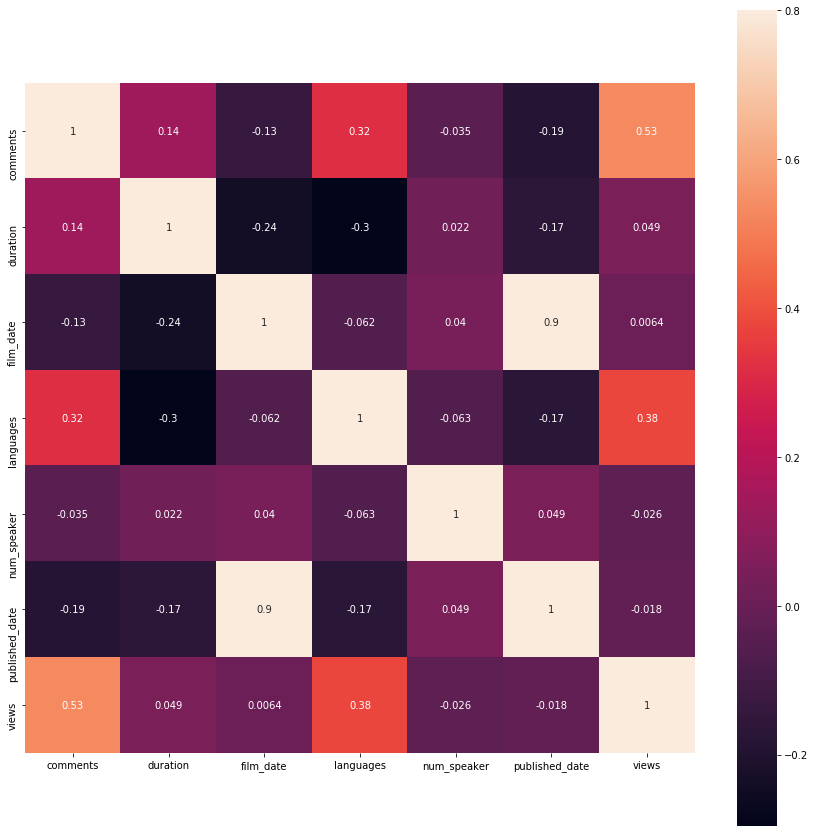

In [348]:
import ast
df_ted_main = pd.read_csv("data/ted_main.csv")

corr = df_ted_main.corr()

fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, annot=True, vmax = .8, square = True)
plt.show()

In [349]:
######### ONE HOT ENCODING #########
# sort


# get only first 100
df_ted_main = df_ted_main.head(100)

# iterate trough data set
for i, row in df_ted_main.iterrows():
    # change string formed list into normal list
    element_list_form = ast.literal_eval(df_ted_main.at[i,'tags'])
    element_list_form = [i.strip() for i in element_list_form]
    # finish converting by replacing string version of a list for the list type
    df_ted_main.at[i,'tags'] = element_list_form

# one hot encoding with column named "tags"
# since "tags" is a Series on each row, I need to split them first and then I can do one host encoding
one_hot_encoded_tags = df_ted_main.drop('tags', 1).join(
    pd.get_dummies(
        pd.DataFrame(df_ted_main.tags.tolist()).stack()
    ).astype(int).sum(level=0)
)

# dropping some columns to have an overview with one hot encoding only
one_hot_encoded_tags = one_hot_encoded_tags.drop(one_hot_encoded_tags.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], axis=1)
one_hot_encoded_tags.head()

,AIDS,Africa,Asia,Brazil,Christianity,DNA,God,Google,MacArthur grant,NASA,...,visualizations,vocals,war,web,wikipedia,women,work,work-life balance,wunderkind,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [350]:
# list_with_counted_column_values = np.empty((0,3), int)
dic_with_counted_column_values = {}

for column in one_hot_encoded_tags:
    value_count = one_hot_encoded_tags[column].value_counts()
    # converting from series to int
    value_count = value_count[1].astype(int)
    dic_with_counted_column_values[column] = value_count
#     list_with_counted_column_values = np.append(list_with_counted_column_values, [[value_count]])
    
# np.sort(list_with_counted_column_values)
dic_with_counted_column_values = sorted(dic_with_counted_column_values.items(), key=lambda x: x[1], reverse=True)
print(dic_with_counted_column_values)



[('culture', 60), ('technology', 33), ('business', 29), ('global issues', 29), ('science', 27), ('entertainment', 24), ('design', 22), ('invention', 20), ('performance', 19), ('storytelling', 13), ('music', 12), ('collaboration', 11), ('environment', 11), ('social change', 11), ('TED Brain Trust', 10), ('art', 10), ('economics', 9), ('cities', 8), ('evolution', 8), ('happiness', 8), ('psychology', 8), ('biology', 7), ('choice', 7), ('entrepreneur', 7), ('Africa', 6), ('TED Prize', 6), ('activism', 6), ('climate change', 6), ('disease', 6), ('future', 6), ('health', 6), ('industrial design', 6), ('media', 6), ('philanthropy', 6), ('poverty', 6), ('religion', 6), ('DNA', 5), ('God', 5), ('biotech', 5), ('creativity', 5), ('genetics', 5), ('global development', 5), ('history', 5), ('nature', 5), ('open-source', 5), ('philosophy', 5), ('photography', 5), ('potential', 5), ('MacArthur grant', 4), ('alternative energy', 4), ('animals', 4), ('architecture', 4), ('brain', 4), ('cognitive scien

In [343]:
df_ted_main = pd.read_csv("data/ted_main.csv")
sort = df_ted_main[['title', 'tags', 'comments']].sort_values('comments', ascending=False).head(100)

sort

,title,tags,comments
96,Militant atheism,"['God', 'atheism', 'culture', 'religion', 'sci...",6404
0,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",4553
644,Science can answer moral questions,"['culture', 'evolutionary psychology', 'global...",3356
201,My stroke of insight,"['biology', 'brain', 'consciousness', 'global ...",2877
1787,How do you explain consciousness?,"['brain', 'consciousness', 'neuroscience', 'ph...",2673
954,Taking imagination seriously,"['art', 'cities', 'culture', 'data', 'design',...",2492
840,On reading the Koran,"['TEDx', 'culture', 'global issues', 'journali...",2374
1346,Your body language may shape who you are,"['body language', 'brain', 'business', 'psycho...",2290
661,The danger of science denial,"['global issues', 'medicine', 'religion', 'sci...",2272
677,How great leaders inspire action,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1930
